In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set()

In [16]:
data = pd.read_csv('diabetes.csv')

In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_54262/433775248.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_54262/433775248.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/var/folders/b

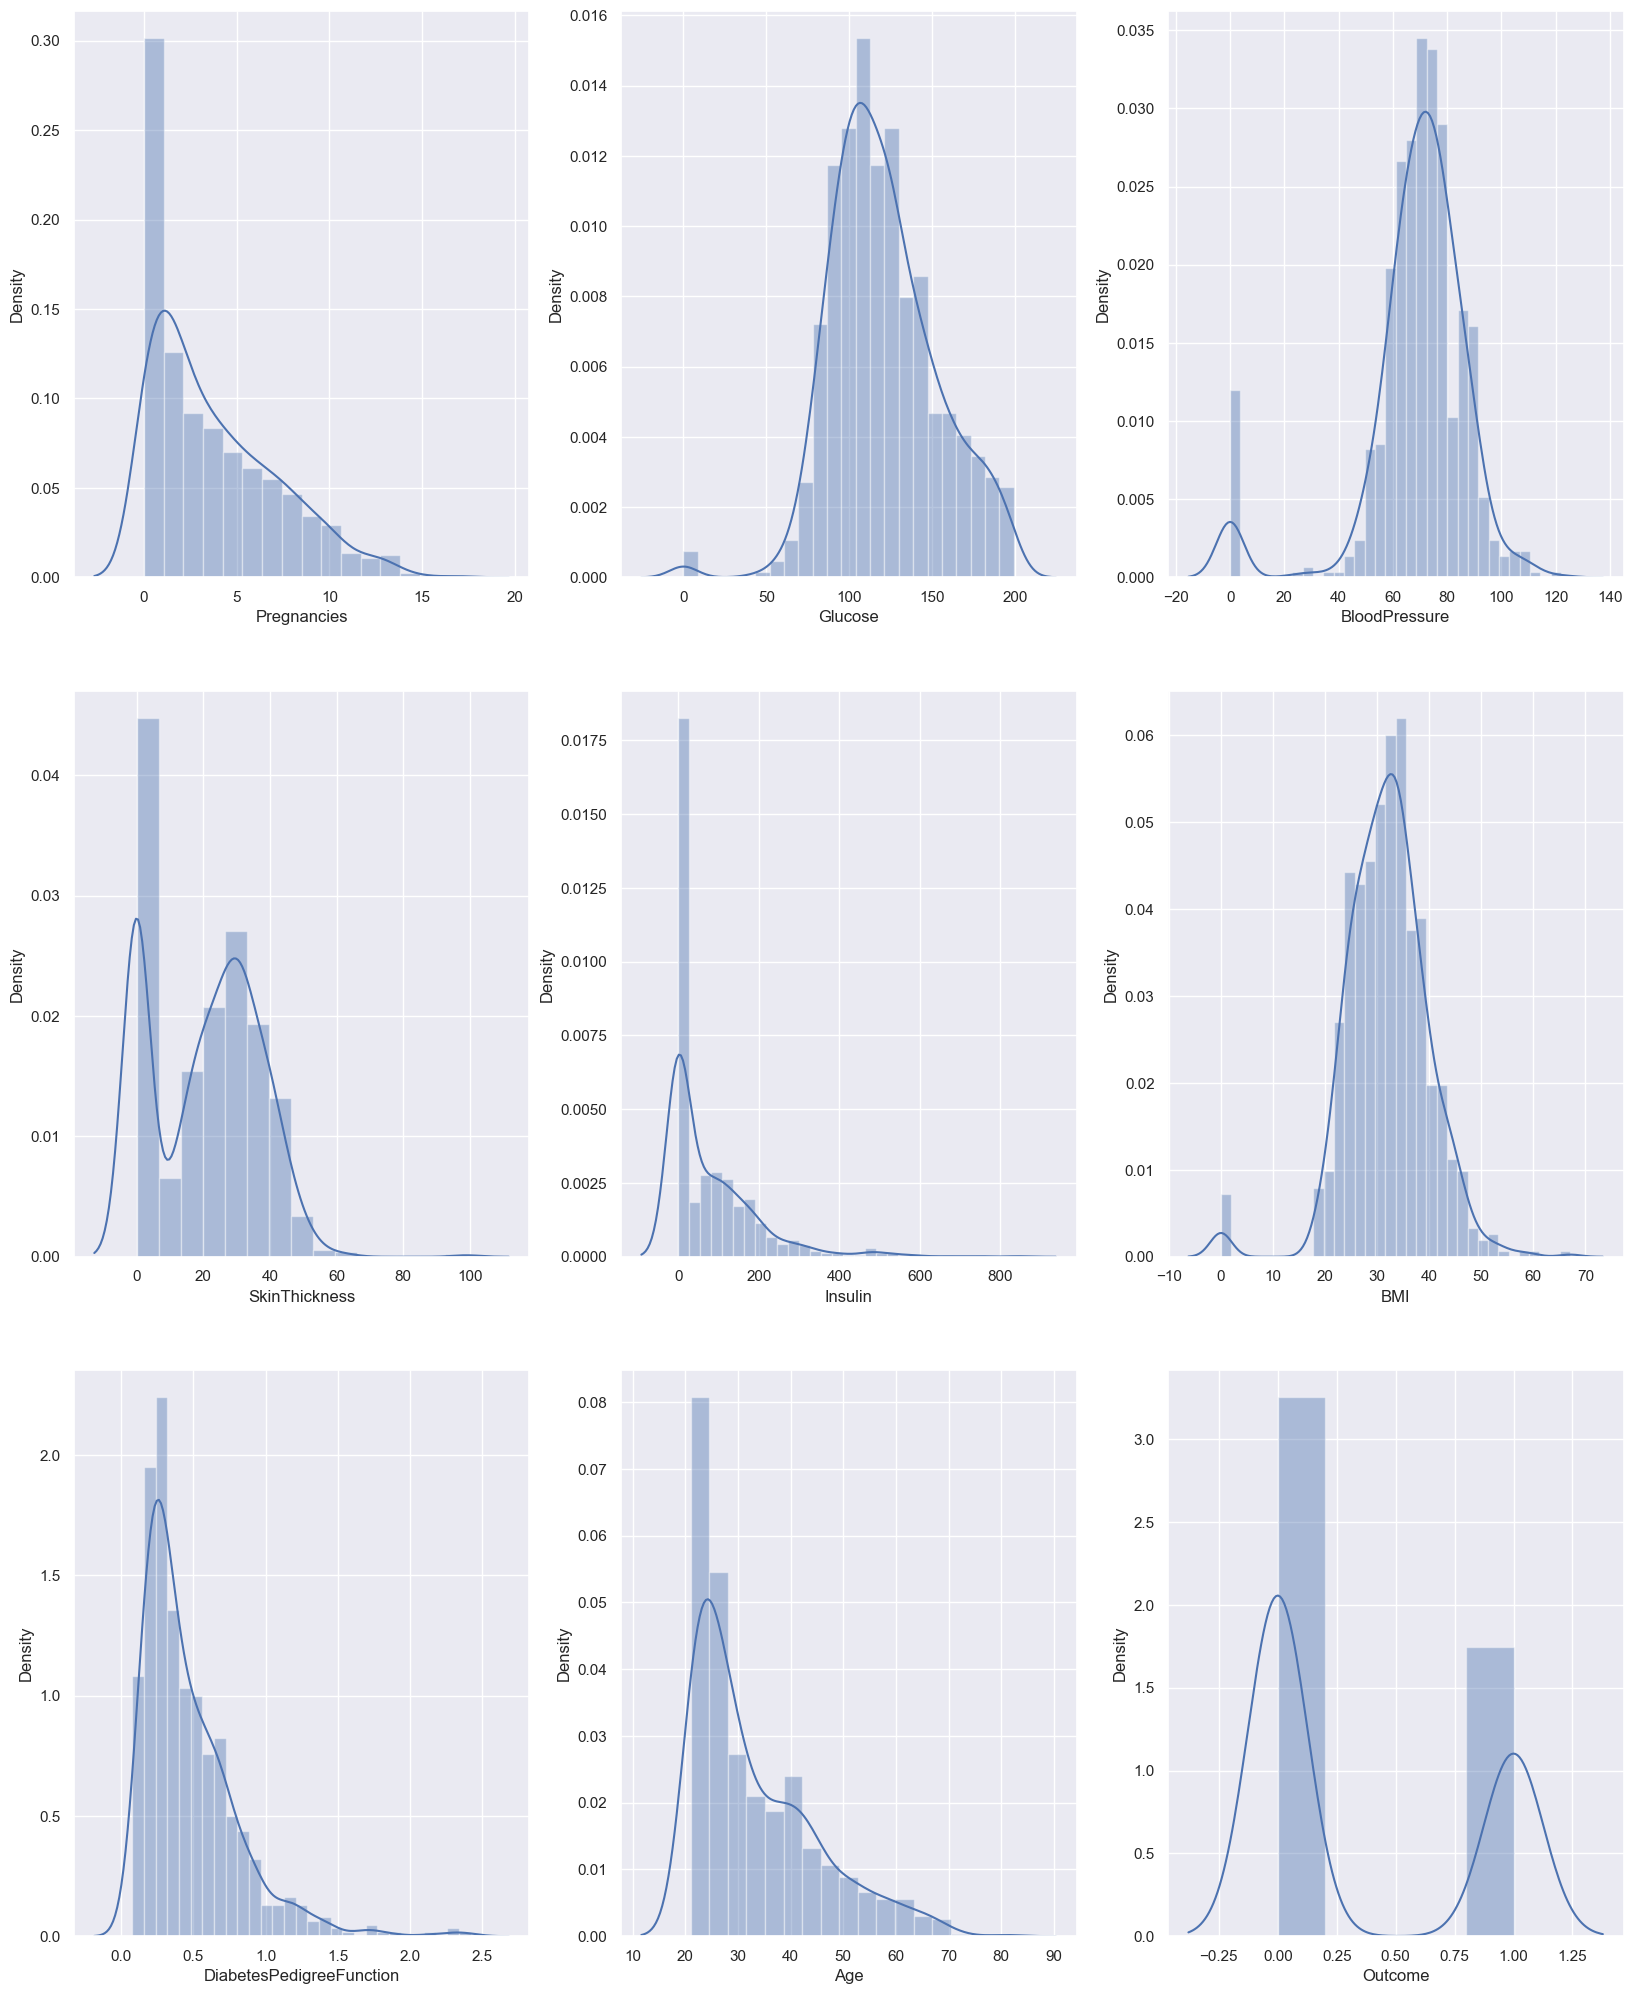

In [20]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [21]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_54262/433775248.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_54262/433775248.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/var/folders/b

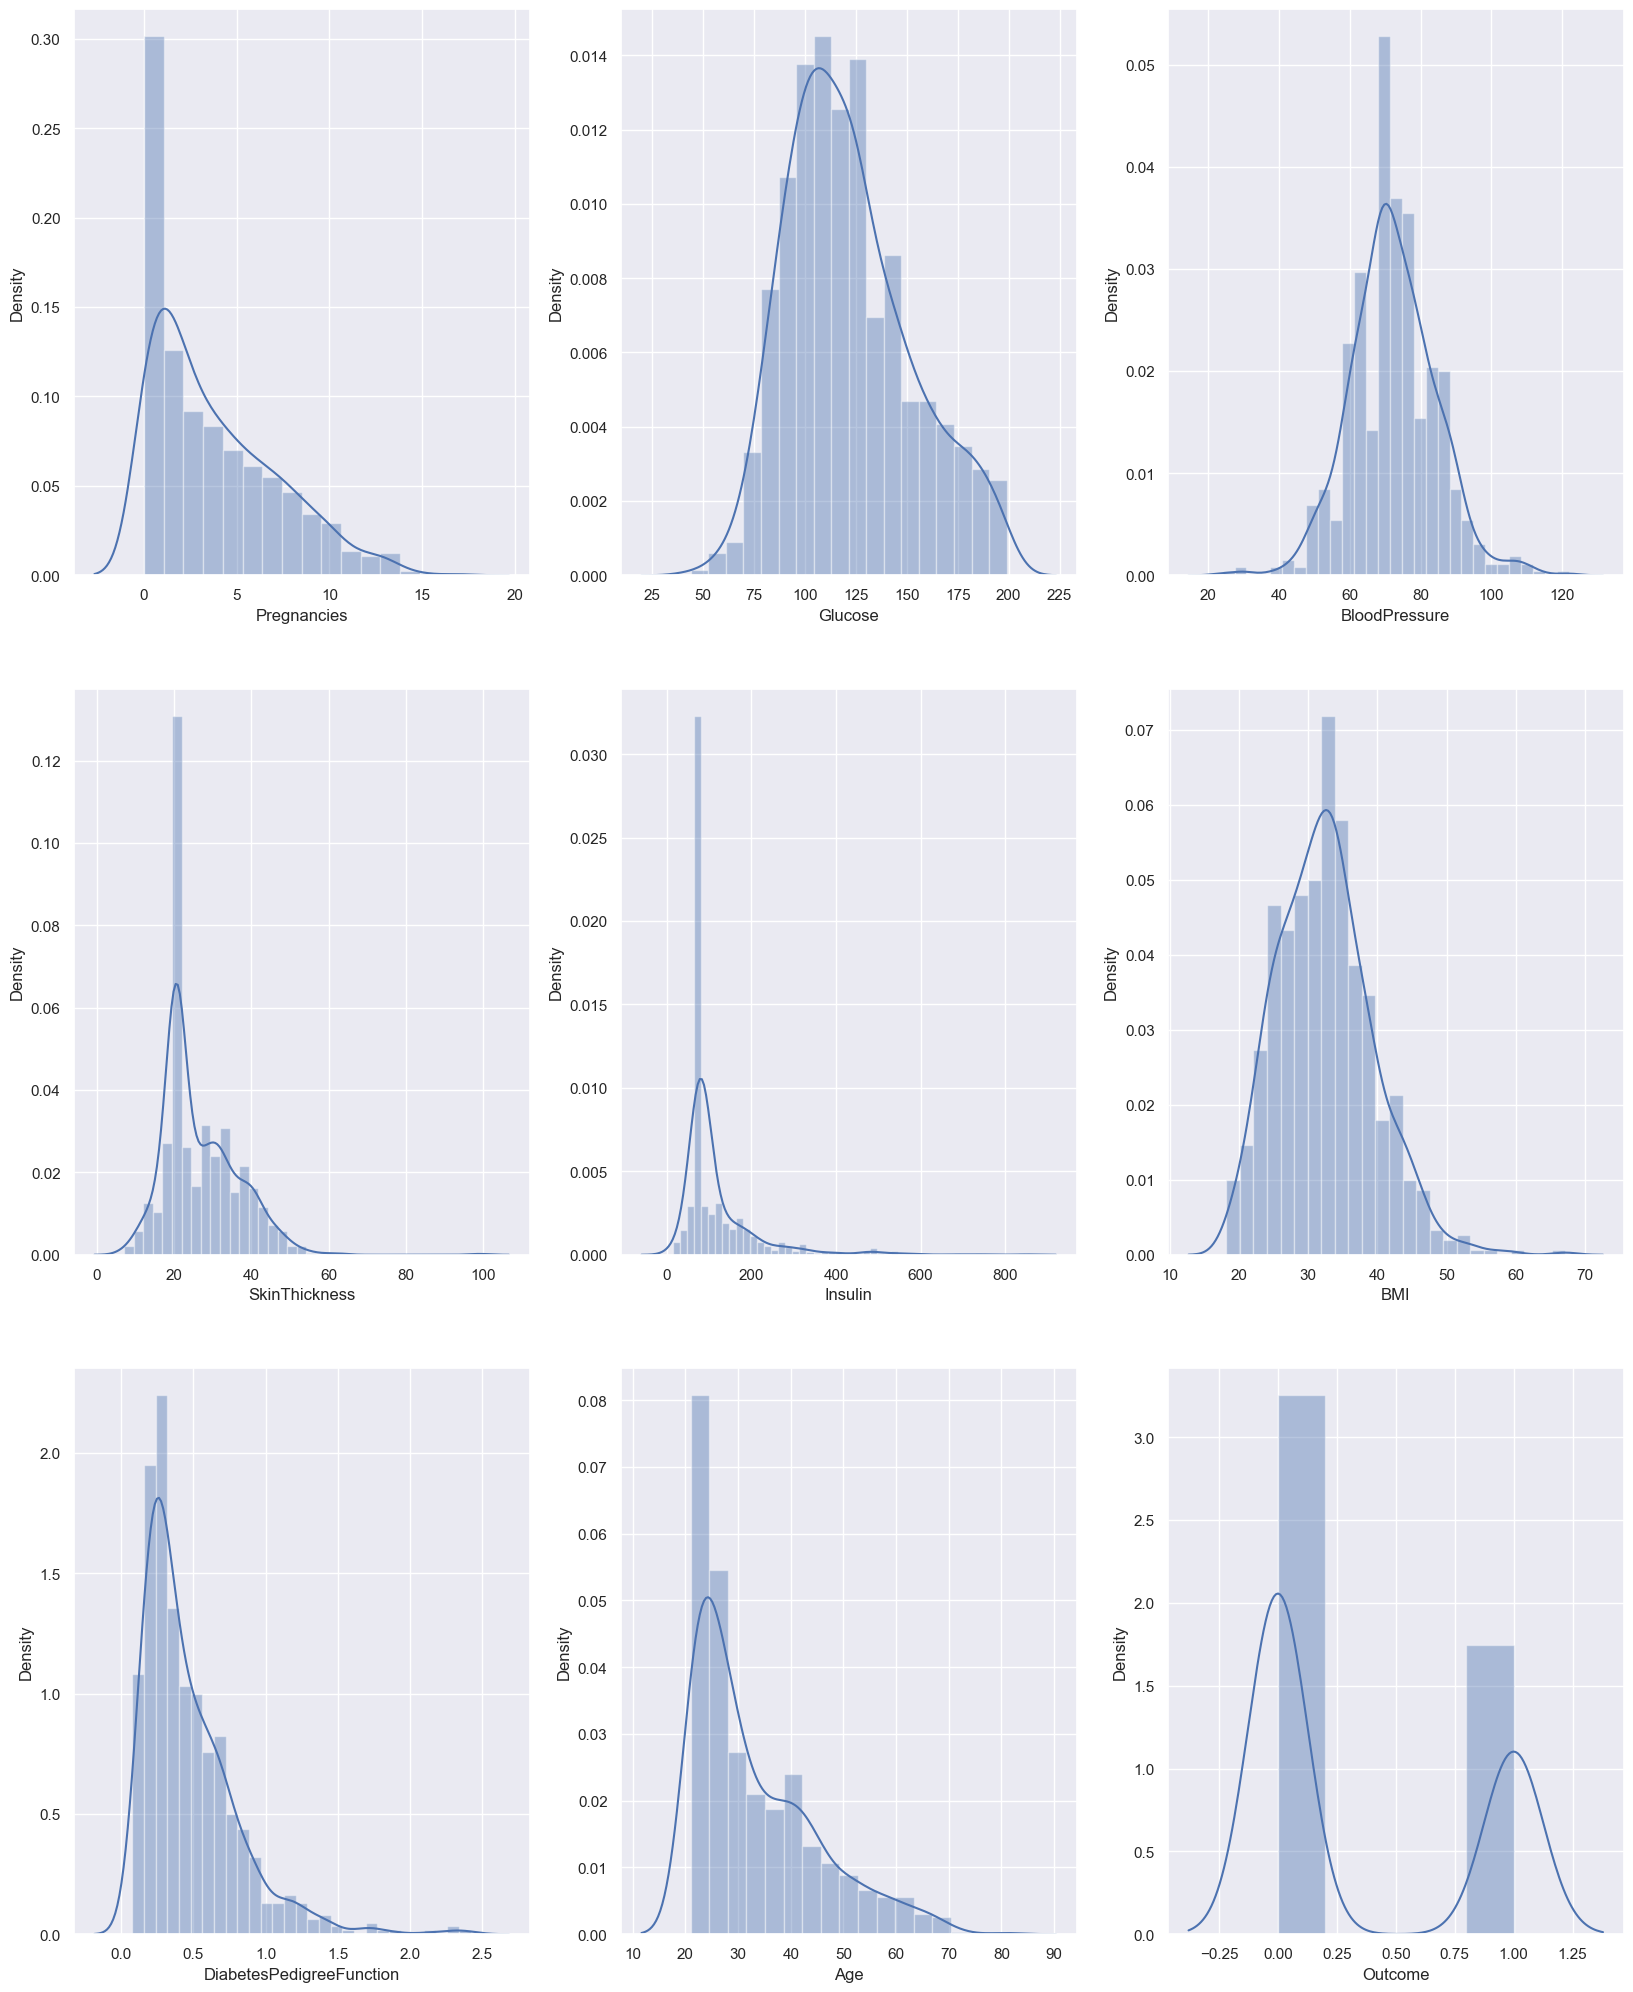

In [22]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

<Axes: >

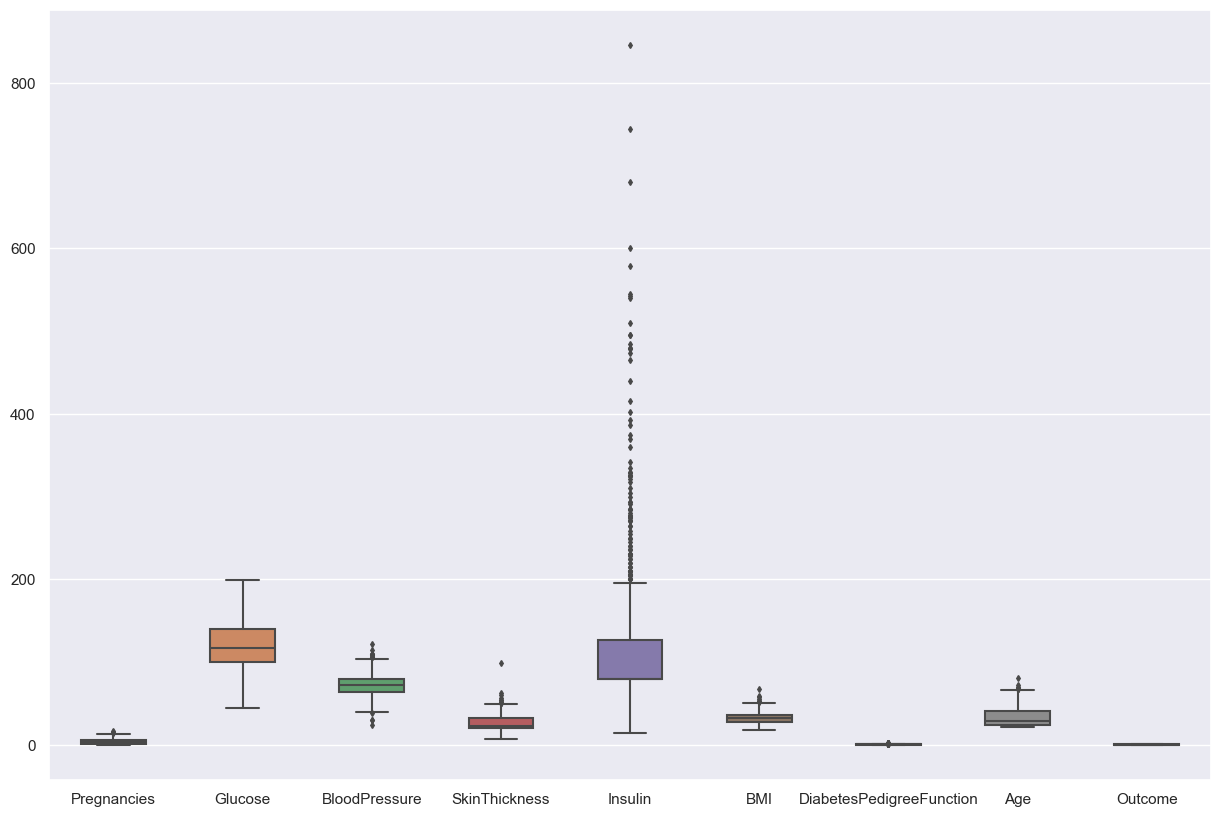

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data,ax=ax,width=0.5,fliersize=3)

In [26]:
## cleaning the pregnancies column
q = data['Pregnancies'].quantile(0.98)
data_cleaned = data[data['Pregnancies']<q]

In [27]:
q = data_cleaned['BMI'].quantile(0.99)
data_cleaned = data[data['BMI']<q]

In [28]:
q = data_cleaned['Insulin'].quantile(0.95)
data_cleaned = data[data['Insulin']<q]

In [29]:
q = data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned = data[data['SkinThickness']<q]

In [30]:
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned = data[data['DiabetesPedigreeFunction']<q]

In [31]:
q = data_cleaned['Age'].quantile(0.99)
data_cleaned = data[data['Age']<q]

/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_54262/433775248.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_54262/433775248.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/var/folders/b

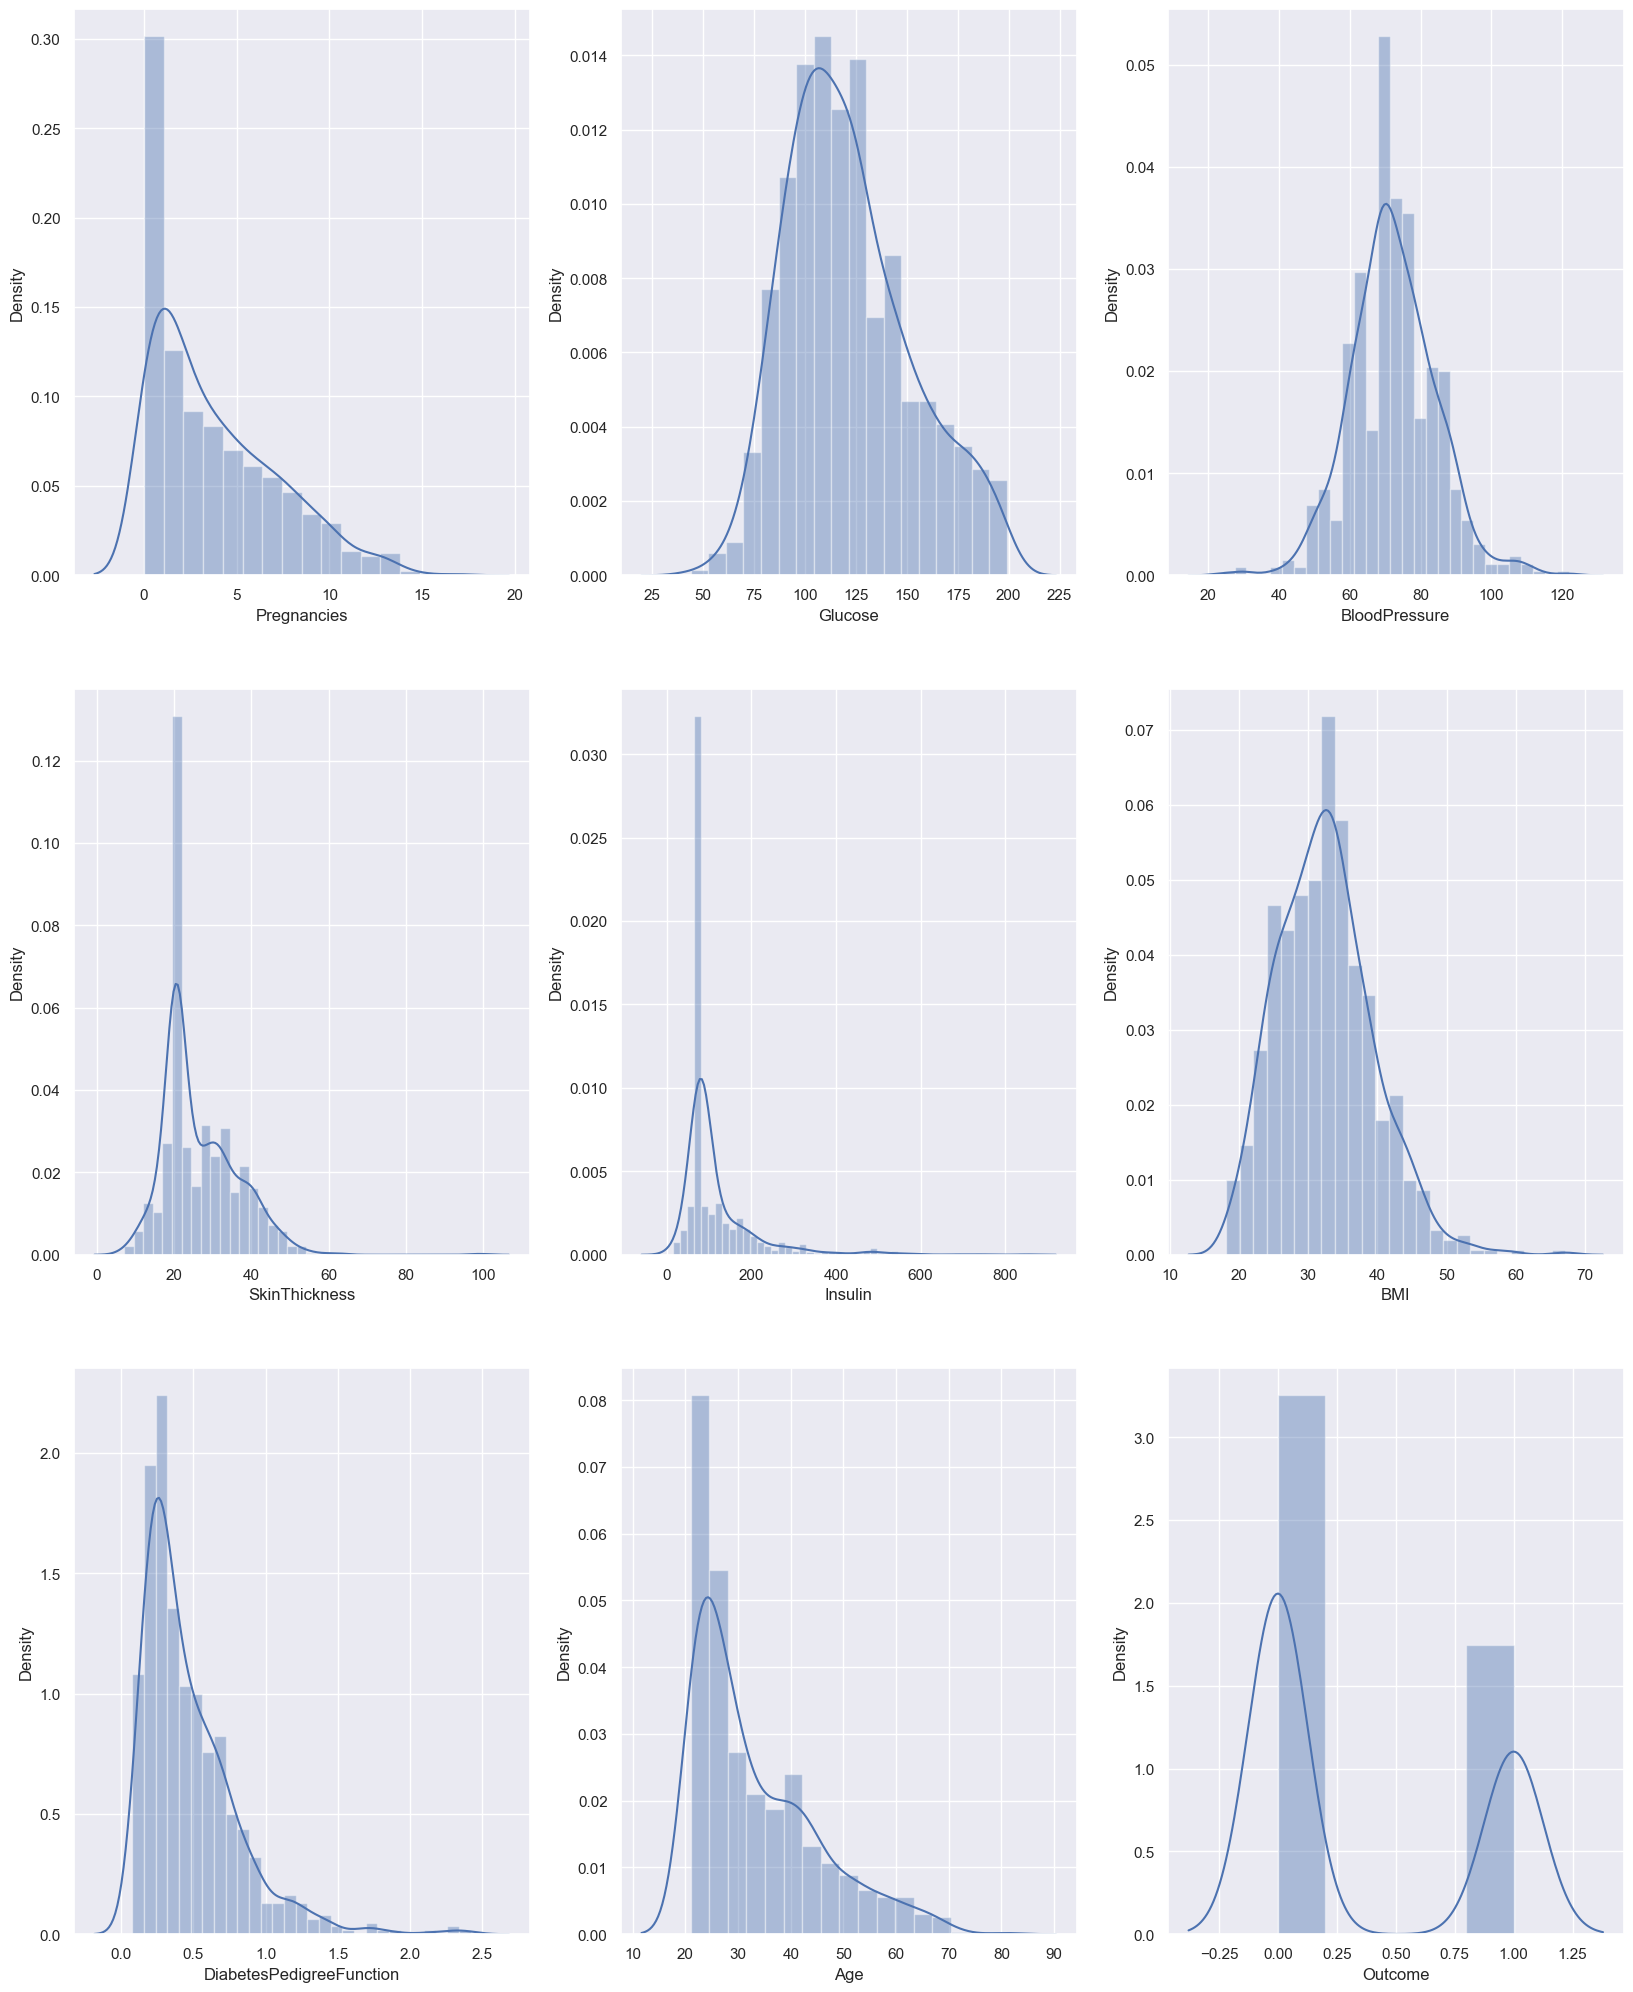

In [32]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [33]:
X = data.drop(columns=['Outcome'],axis=1)
y = data['Outcome']

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# checking for multicollinearity
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

In [39]:
vif

,vif,features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [40]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=50)

In [41]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred = knn.predict(x_test)

In [43]:
print(accuracy_score(y_test,y_pred))

0.7012987012987013


Hyperparameter tuning to see if the accuracy is incresing or not

In [44]:
param_best = {
    'algorithm':['ball_tree','kd_tree','brute'],
    'leaf_size':[18,20,25,27,32,34],
    'n_neighbors':[3,5,7,9,11,13]
}

In [47]:
grid_search = GridSearchCV(knn,param_best,verbose=3)

In [48]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.764 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.780 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.713 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.756 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.724 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.748 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.813 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.730 total 

[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=13;, score=0.780 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=13;, score=0.780 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=13;, score=0.738 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3;, score=0.764 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3;, score=0.780 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3;, score=0.713 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=5;, score=0.756 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=5;, score=0.724 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27,

[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.780 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.797 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.756 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.789 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.697 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.797 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.772 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.772 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.805 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, sco

[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=0.805 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=0.748 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=0.780 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=0.780 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13;, score=0.738 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=3;, score=0.764 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=3;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=3;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=3;, score=0.780 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=3;, score=0.713 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=5;, sco

[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=3;, score=0.764 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=3;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=3;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=3;, score=0.780 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=3;, score=0.713 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=5;, score=0.756 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=5;, score=0.724 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=5;, score=0.748 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=5;, score=0.813 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=5;, score=0.730 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=0.829 total time=   0.0s

[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=3;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=3;, score=0.789 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=3;, score=0.780 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=3;, score=0.713 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=5;, score=0.756 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=5;, score=0.724 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=5;, score=0.748 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=5;, score=0.813 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=5;, score=0.730 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=7;, score=0.829 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=7;, score=0.772 total time=   0.0s

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]},
             verbose=3)

In [49]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 11}

In [50]:
knn_tuned = KNeighborsClassifier(**grid_search.best_params_)

In [51]:
knn_tuned.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [52]:
knn_tuned.score(x_train,y_train)

0.8143322475570033

In [54]:
y_pred_tuned = knn_tuned.predict(x_test)

In [55]:
print(accuracy_score(y_test,y_pred_tuned))

0.7402597402597403


In [57]:
kfold = KFold(n_splits=12,random_state= 42,shuffle=True)
kfold.get_n_splits(X_scaled)

12

In [58]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.7982954545454546 and test score is :   0.6875
for k =  2
train_score is :   0.7855113636363636 and test score is :   0.84375
for k =  3
train_score is :   0.8011363636363636 and test score is :   0.703125
for k =  4
train_score is :   0.8039772727272727 and test score is :   0.75
for k =  5
train_score is :   0.7883522727272727 and test score is :   0.84375
for k =  6
train_score is :   0.8068181818181818 and test score is :   0.734375
for k =  7
train_score is :   0.7911931818181818 and test score is :   0.765625
for k =  8
train_score is :   0.8068181818181818 and test score is :   0.65625
for k =  9
train_score is :   0.7940340909090909 and test score is :   0.828125
for k =  10
train_score is :   0.8025568181818182 and test score is :   0.75
for k =  11
train_score is :   0.7897727272727273 and test score is :   0.75
for k =  12
train_score is :   0.796875 and test score is :   0.71875
************************************************
****************

([<matplotlib.axis.YTick at 0x291ab1840>,
 [Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.7500000000000001, '0.75'),
  Text(0, 0.8000000000000002, '0.80'),
  Text(0, 0.8500000000000002, '0.85'),
  Text(0, 0.9000000000000002, '0.90'),
  Text(0, 0.9500000000000003, '0.95')])

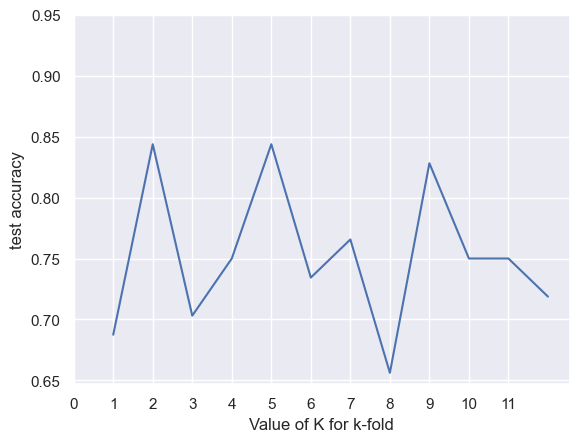

In [59]:
plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 

In [61]:
import pickle

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(knn_tuned,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)